In [113]:
!pip install palmerpenguins
from palmerpenguins import load_penguins
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve
from plotnine import ggplot, aes, geom_line, labs, theme_minimal, geom_abline
from sklearn.metrics import precision_recall_curve

#Palmer Penguins Modeling
Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict species using the other variables in the dataset.

Dummify all variables that require this.

In [133]:
import pandas as pd
import numpy as np

penguins = load_penguins()
penguins = penguins.dropna()
penguins.head()

penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [115]:
X = penguins.drop(["species"], axis = 1)
y = penguins["species"]

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

Column_Transformer = ColumnTransformer([
  ("dummify",
  OneHotEncoder(sparse_output = False, handle_unknown = "ignore"), make_column_selector(dtype_include=object)),
  ("standardize",
  StandardScaler(), make_column_selector(dtype_include=np.number))
  ], remainder = "passthrough")

Let's use the other variables to predict species. Prepare your data and fit the following models on the entire dataset:

Two kNN models (for different values of K)

Two decision tree models (for different complexities of trees)


Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

Confusion matrix

Overall Accuracy

Precision, Recall, AUC, and F1-score for each species


Create one ROC plot for the species of your choice.

In [116]:
knn_3_pipeline = Pipeline(
  [("preprocessing", Column_Transformer),
  ("knn", KNeighborsClassifier(n_neighbors = 3))]
).set_output(transform = "pandas")

knn_3_pipeline_fitted = knn_3_pipeline.fit(X_train, y_train)
knn_3_pipeline_fitted

y_preds_knn_3 = knn_3_pipeline_fitted.predict(X_test)
y_preds_knn_3

array(['Adelie', 'Chinstrap', 'Adelie', 'Gentoo', 'Adelie', 'Chinstrap',
       'Chinstrap', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Chinstrap', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Chinstrap',
       'Gentoo', 'Chinstrap', 'Adelie', 'Adelie', 'Chinstrap',
       'Chinstrap', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap',
       'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Chinstrap', 'Chinstrap', 'Adelie',
       'Adelie', 'Chinstrap', 'Adelie', 'Gentoo', 'Adelie', 'Chinstrap',
       'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Gentoo', 'Adel

In [117]:
knn3_conf_matrix = confusion_matrix(y_test, y_preds_knn_3)
knn3_conf_matrix

array([[40,  0,  0],
       [ 0, 20,  0],
       [ 0,  0, 24]])

In [118]:
scores = classification_report(y_test, y_preds_knn_3, output_dict = True)
scores = pd.DataFrame(scores)
scores

,Adelie,Chinstrap,Gentoo,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0,1.0
support,40.0,20.0,24.0,1.0,84.0,84.0


In [119]:
y_pred_prob1 = knn_3_pipeline_fitted.predict_proba(X_test)

auc_score = roc_auc_score(y_test, y_pred_prob1, multi_class = "ovr")
auc_score

print("AUC Score (One-vs-Rest):", auc_score)

AUC Score (One-vs-Rest): 1.0


In [120]:
knn_30_pipeline = Pipeline(
  [("preprocessing", Column_Transformer),
  ("knn", KNeighborsClassifier(n_neighbors=30))]
).set_output(transform = "pandas")

knn_30_pipeline_fitted = knn_30_pipeline.fit(X_train, y_train)
knn_30_pipeline_fitted

y_preds_knn_30 = knn_30_pipeline_fitted.predict(X_test)
y_preds_knn_30

array(['Adelie', 'Chinstrap', 'Adelie', 'Gentoo', 'Adelie', 'Chinstrap',
       'Chinstrap', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Chinstrap', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Chinstrap',
       'Gentoo', 'Chinstrap', 'Adelie', 'Adelie', 'Chinstrap',
       'Chinstrap', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap',
       'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Chinstrap', 'Chinstrap', 'Adelie',
       'Adelie', 'Chinstrap', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie'], 

In [121]:
knn_30_conf_matrix = confusion_matrix(y_test, y_preds_knn_30)
knn_30_conf_matrix


array([[40,  0,  0],
       [ 2, 18,  0],
       [ 0,  0, 24]])

In [122]:
scores30 = classification_report(y_test, y_preds_knn_30, output_dict=True)
scores30 = pd.DataFrame(scores30)
scores30

,Adelie,Chinstrap,Gentoo,accuracy,macro avg,weighted avg
precision,0.952381,1.000000,1.0,0.97619,0.984127,0.977324
recall,1.000000,0.900000,1.0,0.97619,0.966667,0.976190
f1-score,0.975610,0.947368,1.0,0.97619,0.974326,0.975854
support,40.000000,20.000000,24.0,0.97619,84.000000,84.000000


In [123]:
y_pred_prob2 = knn_30_pipeline_fitted.predict_proba(X_test)

auc_score30 = roc_auc_score(y_test, y_pred_prob2, multi_class='ovr')
auc_score30


print("AUC Score (One-vs-Rest):", auc_score)

AUC Score (One-vs-Rest): 1.0


Decision Tree 1

In [124]:
dt_3_pipeline = Pipeline(
  [("preprocessing", Column_Transformer),
  ("decision_tree", DecisionTreeClassifier(max_depth=3))]
).set_output(transform = "pandas")

dt_3_pipeline_fitted = dt_3_pipeline.fit(X_train, y_train)
dt_3_pipeline_fitted

y_preds_dt_3 = dt_3_pipeline_fitted.predict(X_test)
y_preds_dt_3

array(['Adelie', 'Chinstrap', 'Adelie', 'Gentoo', 'Adelie', 'Chinstrap',
       'Chinstrap', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Chinstrap', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Chinstrap',
       'Gentoo', 'Chinstrap', 'Adelie', 'Adelie', 'Chinstrap',
       'Chinstrap', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap',
       'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Gentoo', 'Adelie', 'Chinstrap', 'Chinstrap', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie'], dty

In [125]:
dt3_conf_matrix = confusion_matrix(y_test, y_preds_dt_3)
dt3_conf_matrix

array([[40,  0,  0],
       [ 3, 17,  0],
       [ 1,  0, 23]])

In [126]:
scores = classification_report(y_test, y_preds_dt_3, output_dict=True)
scores = pd.DataFrame(scores)
scores

,Adelie,Chinstrap,Gentoo,accuracy,macro avg,weighted avg
precision,0.909091,1.000000,1.000000,0.952381,0.969697,0.956710
recall,1.000000,0.850000,0.958333,0.952381,0.936111,0.952381
f1-score,0.952381,0.918919,0.978723,0.952381,0.950008,0.951940
support,40.000000,20.000000,24.000000,0.952381,84.000000,84.000000


In [127]:
y_pred_prob3 = dt_3_pipeline_fitted.predict_proba(X_test)

auc_score3 = roc_auc_score(y_test, y_pred_prob3, multi_class='ovr')
auc_score3
print("AUC Score (One-vs-Rest):", auc_score)

AUC Score (One-vs-Rest): 1.0


Decision Tree 2

In [128]:
dt_10_pipeline = Pipeline(
  [("preprocessing", Column_Transformer),
  ("decision_tree", DecisionTreeClassifier(max_depth=10))]
).set_output(transform = "pandas")

dt_10_pipeline_fitted = dt_10_pipeline.fit(X_train, y_train)
dt_10_pipeline_fitted

y_preds_dt_10 = dt_10_pipeline_fitted.predict(X_test)
y_preds_dt_10

array(['Adelie', 'Chinstrap', 'Adelie', 'Gentoo', 'Adelie', 'Chinstrap',
       'Chinstrap', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Chinstrap', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Chinstrap',
       'Gentoo', 'Chinstrap', 'Adelie', 'Adelie', 'Chinstrap',
       'Chinstrap', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap',
       'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Chinstrap', 'Chinstrap', 'Adelie',
       'Adelie', 'Chinstrap', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie'

In [129]:
dt_10_conf_matrix = confusion_matrix(y_test, y_preds_dt_10)
dt_10_conf_matrix

array([[40,  0,  0],
       [ 1, 19,  0],
       [ 0,  0, 24]])

In [130]:
scores_10_dt = classification_report(y_test, y_preds_dt_10, output_dict = True)
scores_10_dt = pd.DataFrame(scores_10_dt).transpose()
scores_10_dt

,precision,recall,f1-score,support
Adelie,0.975610,1.000000,0.987654,40.000000
Chinstrap,1.000000,0.950000,0.974359,20.000000
Gentoo,1.000000,1.000000,1.000000,24.000000
accuracy,0.988095,0.988095,0.988095,0.988095
macro avg,0.991870,0.983333,0.987338,84.000000
weighted avg,0.988386,0.988095,0.988016,84.000000


In [131]:
y_pred_prob10 = dt_10_pipeline_fitted.predict_proba(X_test)

auc_score_10 = roc_auc_score(y_test, y_pred_prob10, multi_class='ovr')
auc_score_10


print("AUC Score (One-vs-Rest):", auc_score)

AUC Score (One-vs-Rest): 1.0


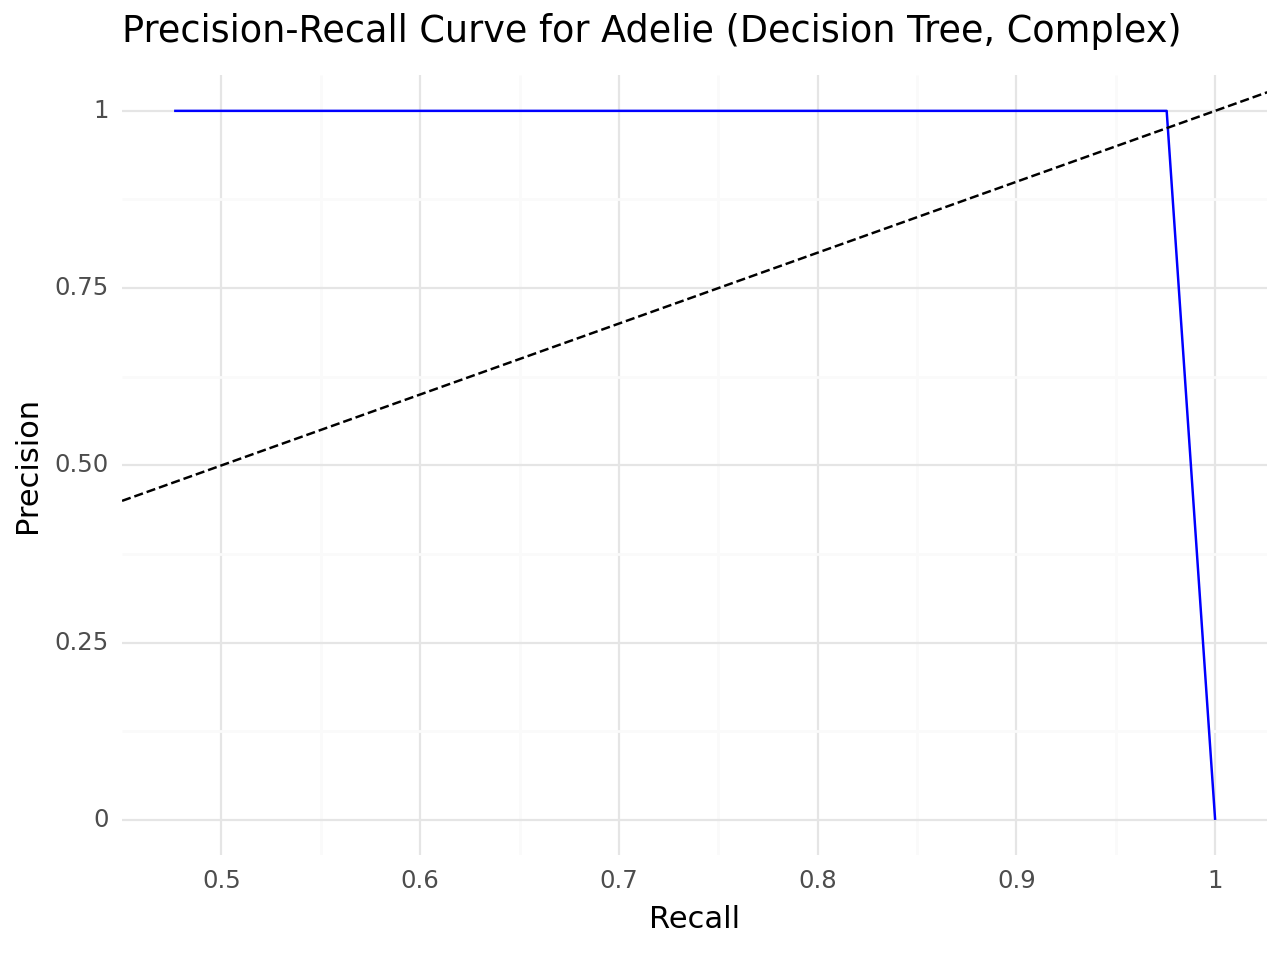

<Figure Size: (640 x 480)>

In [132]:
precision, recall, _ = precision_recall_curve(y_test_binarized_gentoo, y_test_pred_proba_gentoo)

pr_data_gentoo = pd.DataFrame({
    "False Positive Rat": precision,
    "True Positive Rat": recall})

plot = (
    ggplot(pr_data_gentoo, aes(x = "False Positive Rat", y = "True Positive Rat"))
    + geom_line(color = "Blue")
    + geom_abline(linetype='dashed')
    + labs(title = "Precision-Recall Curve for Adelie (Decision Tree, Complex)", x = "Recall", y = "Precision")
    + theme_minimal()
)
plot